In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

from keras.models import load_model
from pathlib import Path

from ml_tb.normalisation import MinMaxScaler
from ml_tb.metrics import RMSE_denormalised_T, RMSE_denormalised_P
from ml_tb.mapping import load_biotite_map, plot_distribution, plot_map

## Load model

In [2]:
# define the custom metrics
scaling_pt = MinMaxScaler(min=[1500, 400], max=[10000, 900], axis=0)
inv_scaling_pt = MinMaxScaler(min=[1500, 400], max=[10000, 900], axis=0, invert=True)

def RMSE_P(y_true, y_pred):
    return RMSE_denormalised_P(y_true, y_pred, inv_scaling_pt)


def RMSE_T(y_true, y_pred):
    return RMSE_denormalised_T(y_true, y_pred, inv_scaling_pt)

In [3]:
model = load_model(Path("..","01_fit_natural_biotite", "saved_models/01a_BtThermobaromater_composition"), compile=False)
model.compile(optimizer="adam", loss="mean_squared_error", metrics=[RMSE_T, RMSE_P])
# model.summary()

## Load map data

### **Nelson Aureole** Diwa BSc thesis (2023)

**Grt-Zone**:
- Expected temperature: ~550 °C
- Expected pressure: ~3.5 kbar

**St-Zone**:
- Expected temperature: ~560 °C
- Expected pressure: ~3.5 kbar

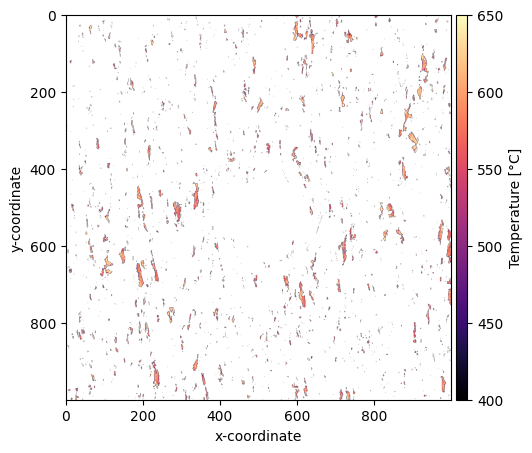

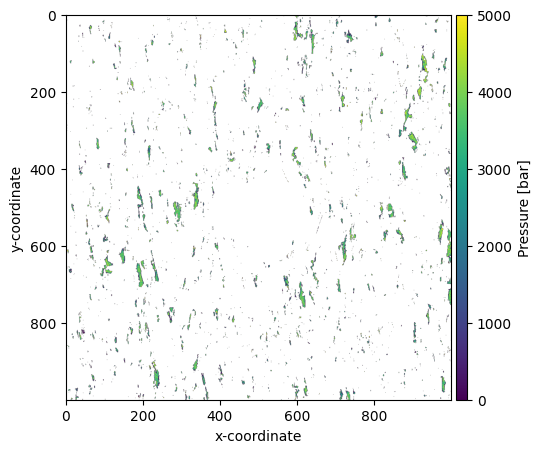

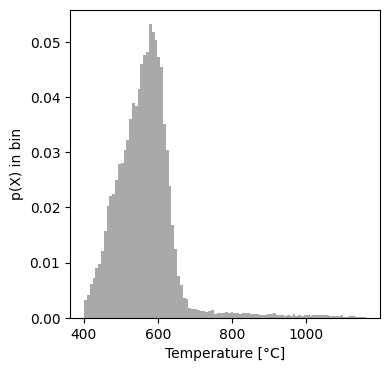

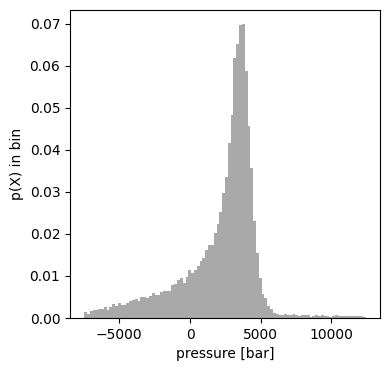

In [4]:
map = Path("XMapTools_map_files", "Aiyana_GrtZone_550_3500.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

plot_map(T_map, variable_name="Temperature [°C]", range=[400, 650])
plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(0000, 5000))

plot_distribution(T_map, variable_name="Temperature [°C]", bins=100)
plot_distribution(P_map, variable_name="pressure [bar]", bins=100)

t_median_GrtNelson = np.median(T_map[T_map != 0])
t_iqr_GrtNelson = (np.percentile(T_map[T_map != 0], 25), np.percentile(T_map[T_map != 0], 75))

p_median_GrtNelson = np.median(P_map[P_map != 0])
p_iqr_GrtNelson = (np.percentile(P_map[P_map != 0], 25), np.percentile(P_map[P_map != 0], 75))

t_ref_GrtNelson = 550
p_ref_GrtNelson = 3500

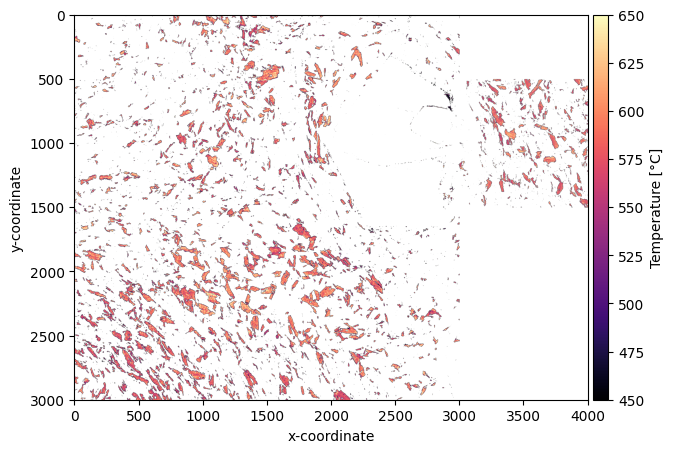

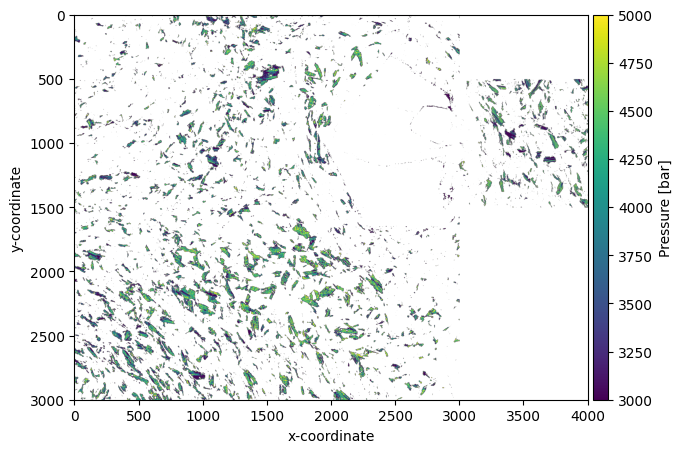

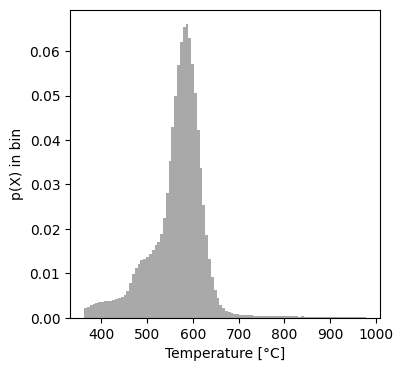

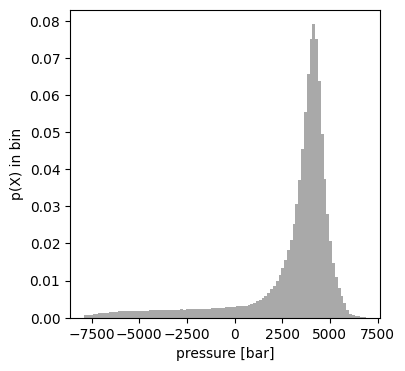

In [5]:
map = Path("XMapTools_map_files", "Aiyana_StZone_560_3500.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

plot_map(T_map, variable_name="Temperature [°C]", range=[450, 650])
plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(3000, 5000))

plot_distribution(T_map, variable_name="Temperature [°C]", bins=100)
plot_distribution(P_map, variable_name="pressure [bar]", bins=100)

t_median_StNelson = np.median(T_map[T_map != 0])
t_iqr_StNelson = (np.percentile(T_map[T_map != 0], 25), np.percentile(T_map[T_map != 0], 75))

p_median_StNelson = np.median(P_map[P_map != 0])
p_iqr_StNelson = (np.percentile(P_map[P_map != 0], 25), np.percentile(P_map[P_map != 0], 75))

t_ref_StNelson = 560
p_ref_StNelson = 3500

### **Serido Belt, BRS** Cioffi et al. (2020)

- Expected temperature: ~589 °C
- Expected pressure: ~3.8 kbar

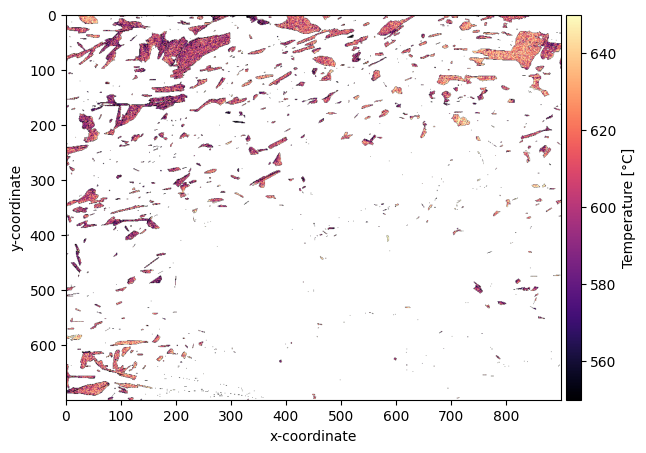

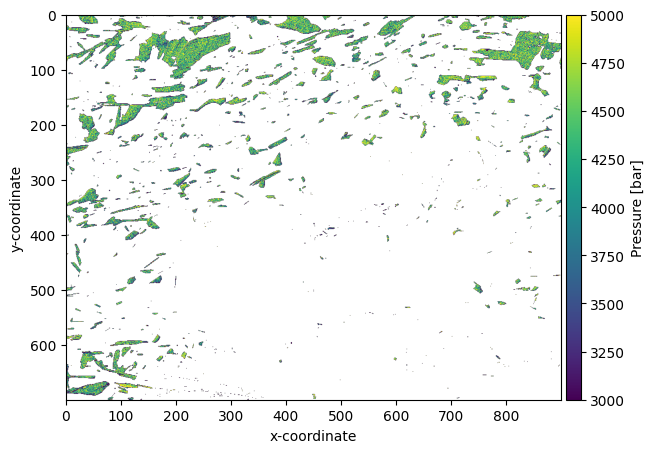

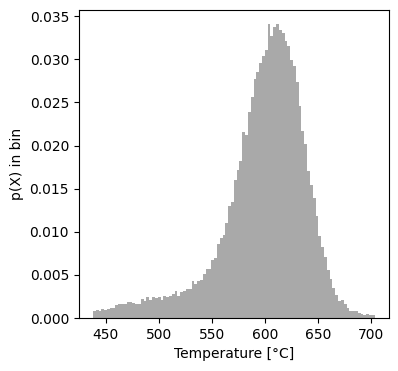

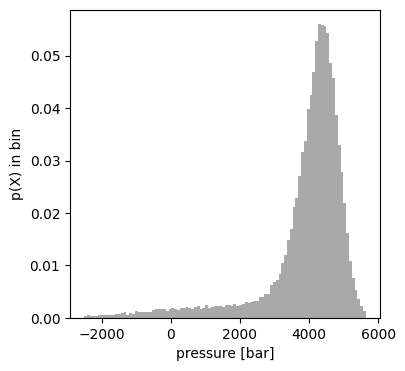

In [6]:
map = Path("XMapTools_map_files", "Cioffi2001_589_3800.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

plot_map(T_map, variable_name="Temperature [°C]", range=[550, 650])
plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(3000, 5000))

plot_distribution(T_map, variable_name="Temperature [°C]", bins=100)
plot_distribution(P_map, variable_name="pressure [bar]", bins=100)

t_median_Serido = np.median(T_map[T_map != 0])
t_iqr_Serido = (np.percentile(T_map[T_map != 0], 25), np.percentile(T_map[T_map != 0], 75))

p_median_Serido = np.median(P_map[P_map != 0])
p_iqr_Serido = (np.percentile(P_map[P_map != 0], 25), np.percentile(P_map[P_map != 0], 75))

t_ref_Serido = 589
p_ref_Serido = 3800

### **Southern Steep Belt** Lanari et al. (2021)

- Expected temperature: ~700 °C
- Expected pressure: ~8 kbar

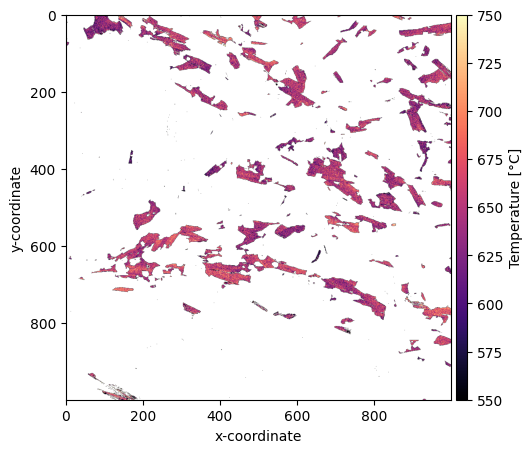

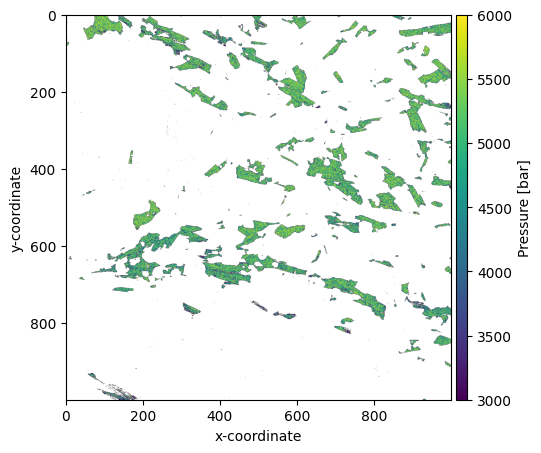

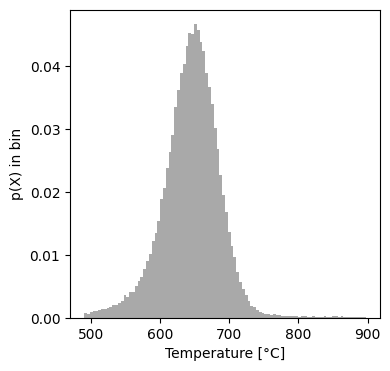

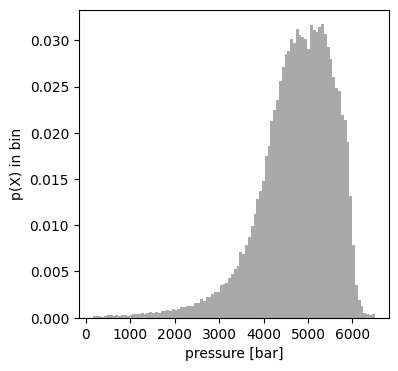

In [7]:
map = Path("XMapTools_map_files", "JuliaArami_700_8000.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

plot_map(T_map, variable_name="Temperature [°C]", range=[550, 750])
plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(3000, 6000))

plot_distribution(T_map, variable_name="Temperature [°C]", bins=100)
plot_distribution(P_map, variable_name="pressure [bar]", bins=100)

t_median_SSB = np.median(T_map[T_map != 0])
t_iqr_SSB = (np.percentile(T_map[T_map != 0], 25), np.percentile(T_map[T_map != 0], 75))

p_median_SSB = np.median(P_map[P_map != 0])
p_iqr_SSB = (np.percentile(P_map[P_map != 0], 25), np.percentile(P_map[P_map != 0], 75))

t_ref_SSB = 700
p_ref_SSB = 8000

### **Central Alps** Lanari & Hermann (2021)

**Area 1 & 2:**
- Expected temperature: 620 °C
- Expected pressure: 9.0 kbar


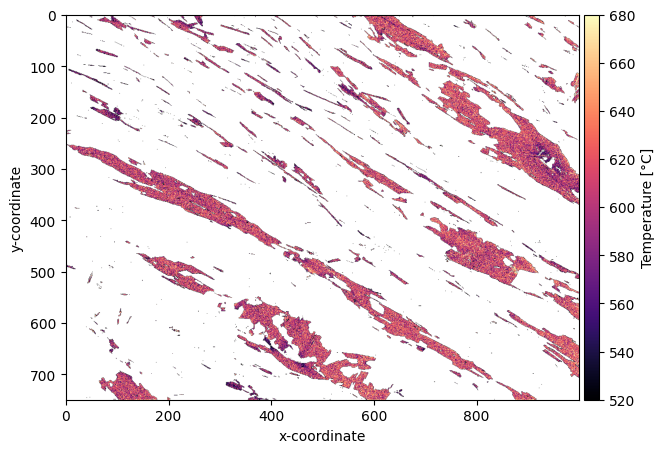

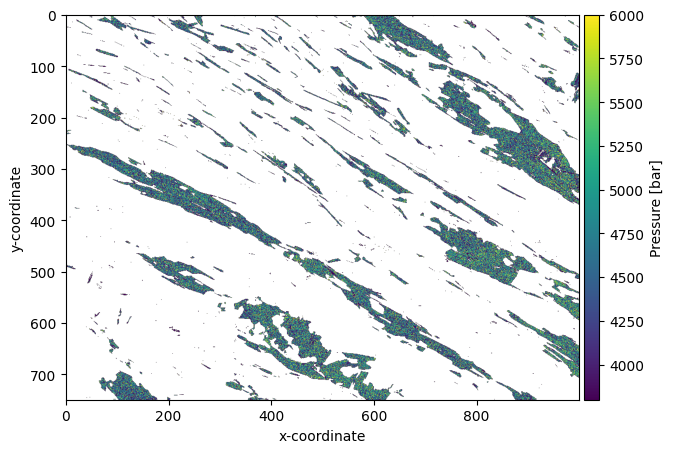

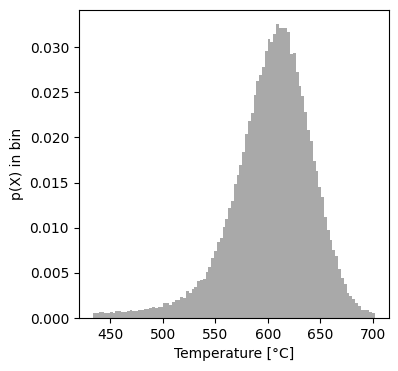

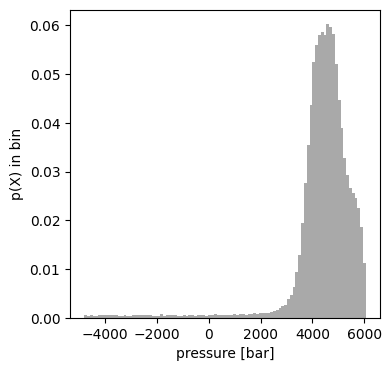

In [8]:
import seaborn as sns

map = Path("XMapTools_map_files", "Lanari_Hermann_2021_Map1.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

fig, ax = plot_map(T_map, variable_name="Temperature [°C]", range=[520, 680])
# fig.savefig("T_Lanari_Hermann_2021_Map1.svg")
fig, ax = plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(3800, 6000))
# fig.savefig("P_Lanari_Hermann_2021_Map1.svg")
plot_distribution(T_map, variable_name="Temperature [°C]", bins=100)
plot_distribution(P_map, variable_name="pressure [bar]", bins=100)

t_median_CentralAlps = np.median(T_map[T_map != 0])
t_iqr_CentralAlps = (np.percentile(T_map[T_map != 0], 25), np.percentile(T_map[T_map != 0], 75))

p_median_CentralAlps = np.median(P_map[P_map != 0])
p_iqr_CentralAlps = (np.percentile(P_map[P_map != 0], 25), np.percentile(P_map[P_map != 0], 75))

t_ref_CentralAlps = 620
p_ref_CentralAlps = 9000

(4532.819006347658,
 <Figure size 400x400 with 1 Axes>,
 <Axes: xlabel='pressure [bar]', ylabel='p(X) in bin'>)

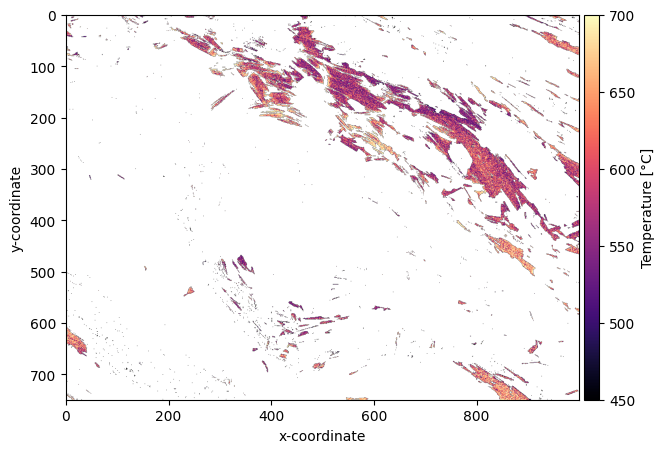

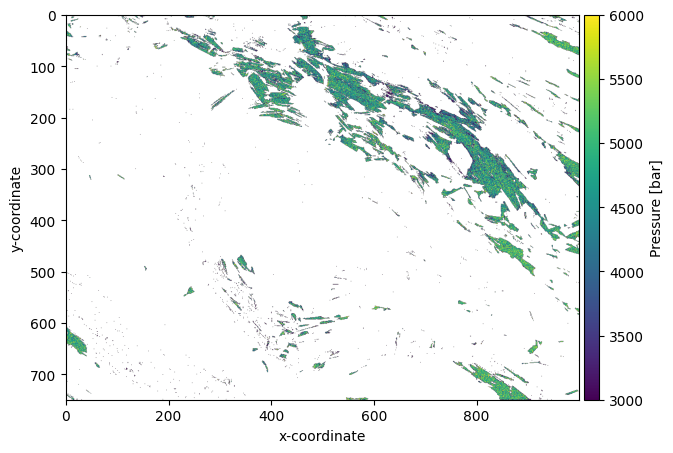

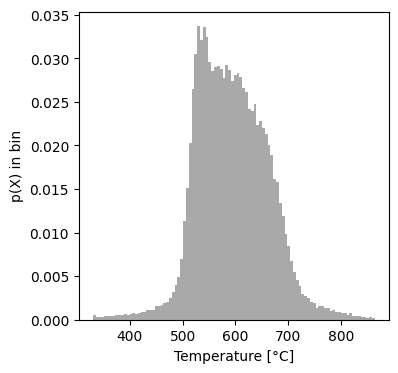

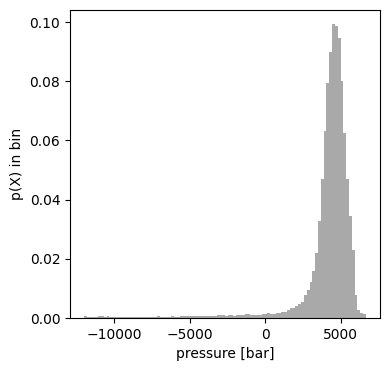

In [9]:
map = Path("XMapTools_map_files", "Lanari_Hermann_2021_Map2.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

plot_map(T_map, variable_name="Temperature [°C]", range=[450, 700])
plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(3000, 6000))

plot_distribution(T_map, variable_name="Temperature [°C]", bins=100)
plot_distribution(P_map, variable_name="pressure [bar]", bins=100)

### **Higher Himalayan Crystalline Sequence (Sikkim)** Lanari & Duesterhoeft (2019)

- Expected temperature: ~790 °C
- Expected pressure: ~6.4 kbar

Mode of the temperature distribution:  721.2231496175131
Mode of the pressure distribution:  6817.031624348959


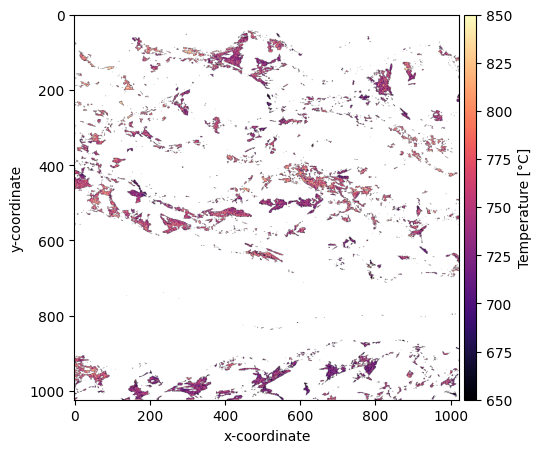

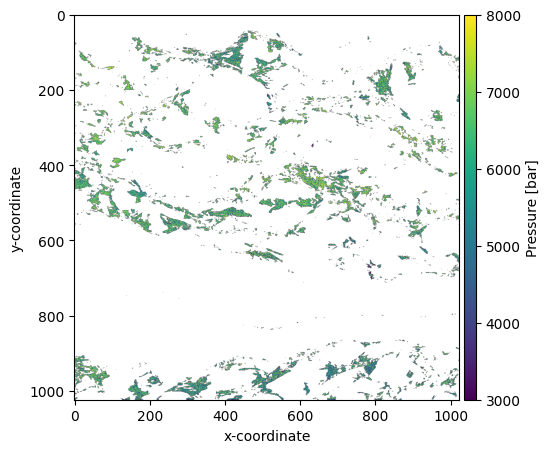

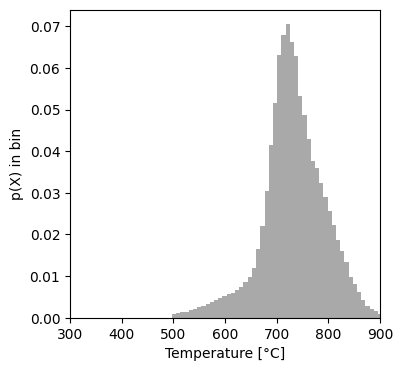

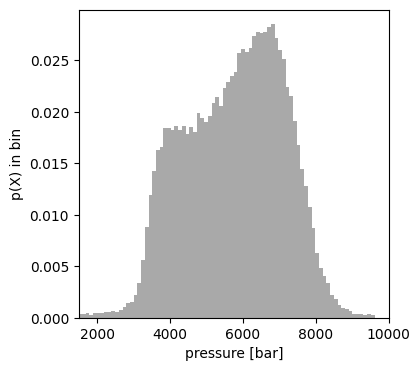

In [10]:

map = Path("XMapTools_map_files", "LanariDuesterhoeft2019_790_6400.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

fig, ax = plot_map(T_map, variable_name="Temperature [°C]", range=[650, 850])
fig, ax = plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(3000, 8000))

mode, fig, ax = plot_distribution(T_map, variable_name="Temperature [°C]", bins=60, x_lims=[300, 900])
print("Mode of the temperature distribution: ", mode)
mode, fig, ax = plot_distribution(P_map, variable_name="pressure [bar]", bins=150, x_lims=[1500, 10000])
print("Mode of the pressure distribution: ", mode)

t_median_Sikkim = np.median(T_map[T_map != 0])
t_iqr_Sikkim = (np.percentile(T_map[T_map != 0], 25), np.percentile(T_map[T_map != 0], 75))

p_median_Sikkim = np.median(P_map[P_map != 0])
p_iqr_Sikkim = (np.percentile(P_map[P_map != 0], 25), np.percentile(P_map[P_map != 0], 75))

t_ref_Sikkim = 790
p_ref_Sikkim = 6400

### **West Guilford (Ontario)** Duesterhoeft & Lanari (2020)

- Expected temperature: ~660 °C
- Expected pressure: ~7 kbar

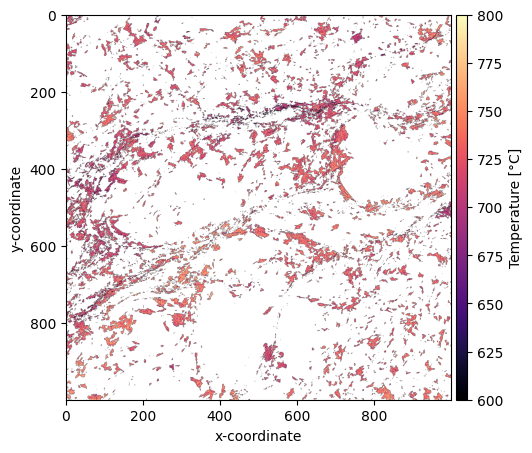

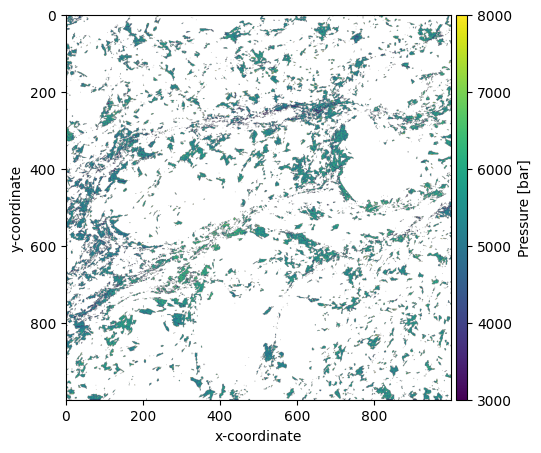

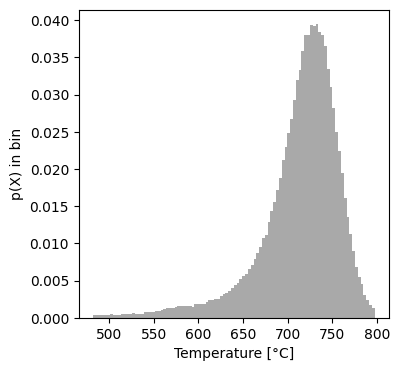

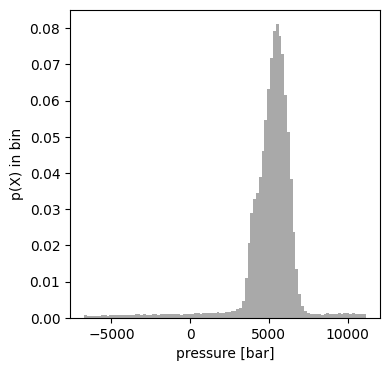

In [11]:
map = Path("XMapTools_map_files", "LanariDuesterhoeft2020_660_7000.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

plot_map(T_map, variable_name="Temperature [°C]", range=[600, 800])
plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(3000, 8000))

plot_distribution(T_map, variable_name="Temperature [°C]", bins=100)
plot_distribution(P_map, variable_name="pressure [bar]", bins=100)

t_median_WestGuilford = np.median(T_map[T_map != 0])
t_iqr_WestGuilford = (np.percentile(T_map[T_map != 0], 25), np.percentile(T_map[T_map != 0], 75))

p_median_WestGuilford = np.median(P_map[P_map != 0])
p_iqr_WestGuilford = (np.percentile(P_map[P_map != 0], 25), np.percentile(P_map[P_map != 0], 75))

t_ref_WestGuilford = 660
p_ref_WestGuilford = 7000

### **Cima di Gagnone** Piccoli et al. (2022)

- Expected temperature: ~620 °C
- Expected pressure: ~10 kbar

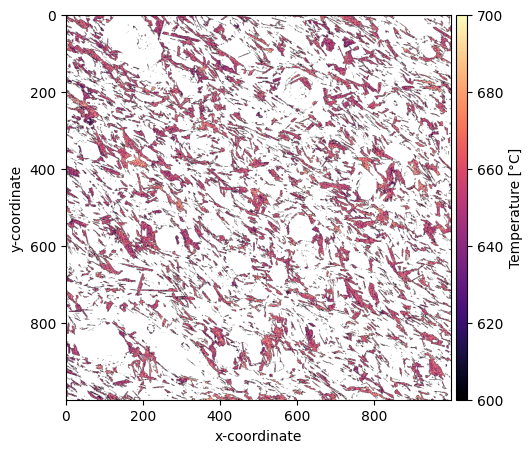

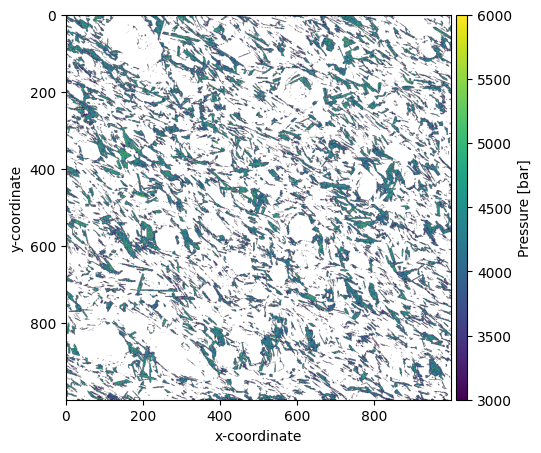

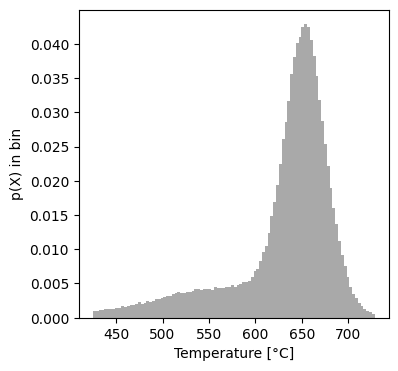

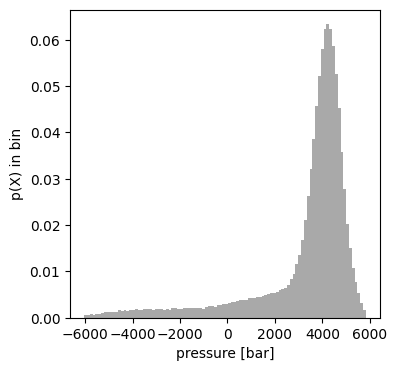

In [12]:
map = Path("XMapTools_map_files", "Piccoli2022_620_10000.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

plot_map(T_map, variable_name="Temperature [°C]", range=[600, 700])
plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(3000, 6000))

plot_distribution(T_map, variable_name="Temperature [°C]", bins=100)
plot_distribution(P_map, variable_name="pressure [bar]", bins=100)

t_median_CimadiGagnone = np.median(T_map[T_map != 0])
t_iqr_CimadiGagnone = (np.percentile(T_map[T_map != 0], 25), np.percentile(T_map[T_map != 0], 75))

p_median_CimadiGagnone = np.median(P_map[P_map != 0])
p_iqr_CimadiGagnone = (np.percentile(P_map[P_map != 0], 25), np.percentile(P_map[P_map != 0], 75))

t_ref_CimadiGagnone = 620
p_ref_CimadiGagnone = 10000

### **El Oro Xenolith** Lanari & Riel (in prep.)

- Expected temperature: ~700 °C
- Expected pressure: ~2 kbar

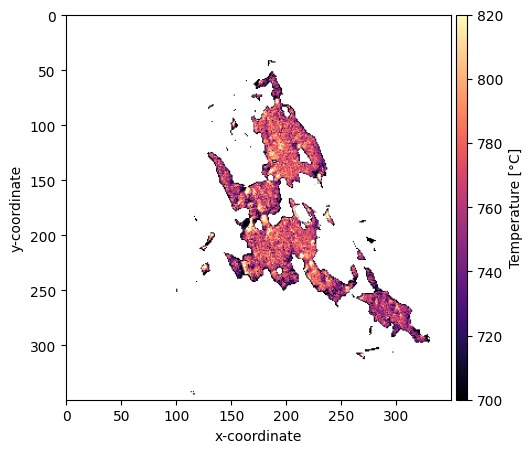

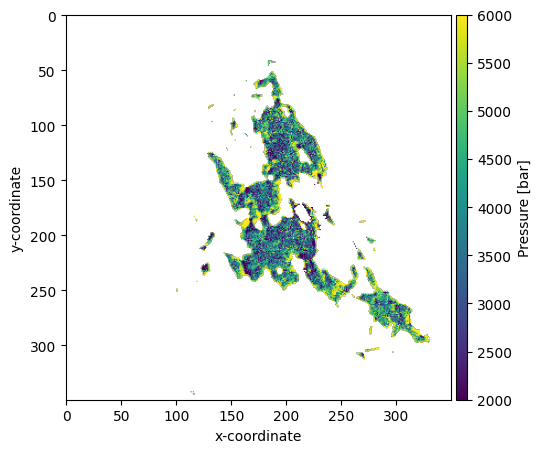

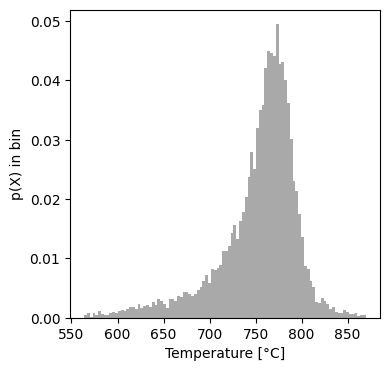

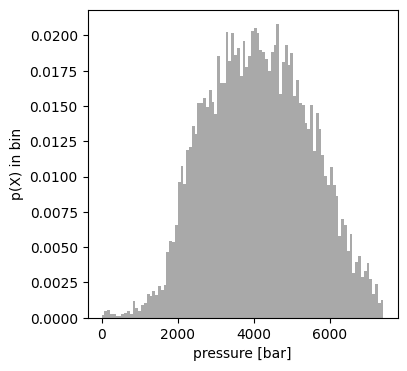

In [13]:
map = Path("XMapTools_map_files", "XenolithElOro_750_2000.hdf5")

biotite_map, map_empty, idx_phase_pixel = load_biotite_map(map, element_order=["Si", "Ti", "Al", "Fe", "Mn", "Mg"])

PT_prediction = inv_scaling_pt(model(biotite_map))

T_map = np.zeros_like(map_empty)
P_map = np.zeros_like(map_empty)

T_map[idx_phase_pixel] = PT_prediction[:, 1].numpy().flatten()
P_map[idx_phase_pixel] = PT_prediction[:, 0].numpy().flatten()

plot_map(T_map, variable_name="Temperature [°C]", range=[700, 820])
plot_map(P_map, variable_name="Pressure [bar]", cmap="viridis", range=(2000, 6000))

plot_distribution(T_map, variable_name="Temperature [°C]", bins=100)
plot_distribution(P_map, variable_name="pressure [bar]", bins=100)

t_median_ElOro = np.median(T_map[T_map != 0])
t_iqr_ElOro = (np.percentile(T_map[T_map != 0], 25), np.percentile(T_map[T_map != 0], 75))

p_median_ElOro = np.median(P_map[P_map != 0])
p_iqr_ElOro = (np.percentile(P_map[P_map != 0], 25), np.percentile(P_map[P_map != 0], 75))

t_ref_ElOro = 750
p_ref_ElOro = 2000

# **Predicted P-T vs. reference data**

In [14]:
t_pred = [t_median_GrtNelson,
          t_median_StNelson,
          t_median_Serido,
          t_median_SSB,
          t_median_CentralAlps,
          t_median_Sikkim,
          t_median_WestGuilford,
          t_median_CimadiGagnone,
          t_median_ElOro]

t_pred_iqr = [t_iqr_GrtNelson,
              t_iqr_StNelson,
              t_iqr_Serido,
              t_iqr_SSB,
              t_iqr_CentralAlps,
              t_iqr_Sikkim,
              t_iqr_WestGuilford,
              t_iqr_CimadiGagnone,
              t_iqr_ElOro]

t_ref = [t_ref_GrtNelson,
         t_ref_StNelson,
         t_ref_Serido,
         t_ref_SSB,
         t_ref_CentralAlps,
         t_ref_Sikkim,
         t_ref_WestGuilford,
         t_ref_CimadiGagnone,
         t_ref_ElOro]

p_pred = [p_median_GrtNelson,
          p_median_StNelson,
          p_median_Serido,
          p_median_SSB,
          p_median_CentralAlps,
          p_median_Sikkim,
          p_median_WestGuilford,
          p_median_CimadiGagnone,
          p_median_ElOro]

p_pred_iqr = [p_iqr_GrtNelson,
              p_iqr_StNelson,
              p_iqr_Serido,
              p_iqr_SSB,
              p_iqr_CentralAlps,
              p_iqr_Sikkim,
              p_iqr_WestGuilford,
              p_iqr_CimadiGagnone,
              p_iqr_ElOro]

p_ref = [p_ref_GrtNelson,
         p_ref_StNelson,
         p_ref_Serido,
         p_ref_SSB,
         p_ref_CentralAlps,
         p_ref_Sikkim,
         p_ref_WestGuilford,
         p_ref_CimadiGagnone,
         p_ref_ElOro]

t_error = abs(np.array(t_pred_iqr).T - np.array(t_pred).T)
p_error = abs(np.array(p_pred_iqr).T - np.array(p_pred).T)

labels = ["Nelson Aureole - Grt Zone",
          "Nelson Aureole - St Zone",
          "Serido Belt",
          "Southern Steep Zone",
          "Central Alps",
          "Sikkim Himalaya",
          "West Guilford",
          "Cima di Gagnone",
          "El Oro"]

markers = ["o", "o", "D", "v", "^", ">", "<", "p", "s"]
colors = ["black", "black", "black", "black", "red", "black", "black", "black", "black"]

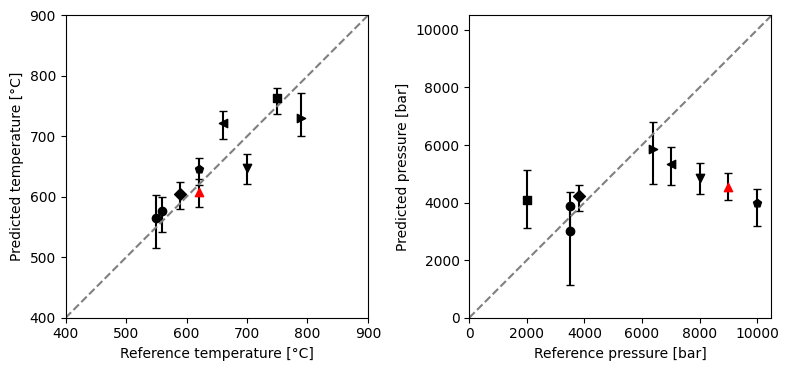

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

axs[0].errorbar(t_ref, t_pred, yerr=t_error, fmt="None", capsize=3, color="black")
for i, marker in enumerate(markers):
    axs[0].scatter(t_ref[i], t_pred[i], label=labels[i], marker=marker, c=colors[i], zorder=3)
axs[0].plot([400, 900], [400, 900], "--", color="gray")
axs[0].set_xlabel("Reference temperature [°C]")
axs[0].set_ylabel("Predicted temperature [°C]")
axs[0].set_xlim([400, 900])
axs[0].set_ylim([400, 900])
axs[0].set_aspect("equal")

axs[1].errorbar(p_ref, p_pred, yerr=p_error, fmt="None", capsize=3, color="black")
for i, marker in enumerate(markers):
    axs[1].scatter(p_ref[i], p_pred[i], label=labels[i], marker=marker, c=colors[i], zorder=3)
axs[1].plot([0, 10500], [0, 10500], "--", color="gray")
axs[1].set_xlabel("Reference pressure [bar]")
axs[1].set_ylabel("Predicted pressure [bar]")
axs[1].set_xlim([0, 10500])
axs[1].set_ylim([0, 10500])
axs[1].set_aspect("equal")

fig.tight_layout()

# fig.savefig("Pred_vs_Ref_maps.svg")

### Calculate RMSE

In [16]:
rmse_T = np.sqrt(np.mean(np.square(np.array(t_ref) - np.array(t_pred))))
rmse_P = np.sqrt(np.mean(np.square(np.array(p_ref) - np.array(p_pred))))

print("RMSE T [C] {0:.2f}".format(rmse_T))
print("RMSE P [bar] {0:.2f}".format(rmse_P))

RMSE T [C] 36.32
RMSE P [bar] 2861.76
